# Visualizing the popularity  of the tv show "The Office!"

The assignment requires to get some insights into the famous US tv show "The Office!" based on the csv data available on https://www.kaggle.com/nehaprabhavalkar/the-office-dataset

The tasks are:

1. Create a matplotlib scatter plot of the data that contains the following attributes:

    1.1 Each episode's episode number plotted along the x-axis and each episode's Viewership (in millions) plotted along the y-axis.
    1.2 A title, reading "Popularity, Quality, and Guest Appearances on the Office".An x-axis label reading "Episode Number". A y-axis label reading "Viewership (Millions)"
    1.3 A color scheme reflecting the scaled ratings (not the regular ratings) of each episode, such that:

  * scaled_ratings < 0.25 are colored "red".

  * scaled_ratings >= 0.25 and < 0.50 are colored "orange".

  * scaled_ratings >= 0.50 and < 0.75 are colored "lightgreen".

  * scaled_ratings >= 0.75 are colored "darkgreen".
  
   1.4 A sizing system, such that episodes with guest appearances have a marker size  of 250 and episodes without are sized 25.
   
  
2. Try to differentiate guest appearances not just with size, but also with a star! 

   *   Provide the names of the guest stars who was in the most watched Office episode.





In [297]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [11, 7]
plt.style.use('seaborn')

tvshow_df = pd.read_csv(r'C:\Users\MINHAJ\Desktop\pyt\the_office_series.csv', index_col = 0)

tvshow_df.head(5)


,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers,scaled_ratings
0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,24 March 2005,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,0.28125
1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,29 March 2005,NaN,Ken Kwapis,B. J. Novak,0.53125
2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,5 April 2005,NaN,Ken Whittingham,Paul Lieberstein,0.37500
3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,12 April 2005,NaN,Bryan Gordon,Michael Schur,0.46875
4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,19 April 2005,NaN,Greg Daniels,Greg Daniels,0.56250


In [298]:
#Creating the Collumn of Episode with Gueststar in Boolean.

tvshow_df['GuestStars'] = tvshow_df['GuestStars'].fillna(0)
has_guest=[]
for ind, row in tvshow_df.iterrows():
    if row['GuestStars'] == 0 :
        has_guest.append(False)
    else:
        has_guest.append(True)
        
tvshow_df['has_guest']=has_guest
tvshow_df.head(6)


,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers,scaled_ratings,has_guest
0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,24 March 2005,0,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,0.28125,False
1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,29 March 2005,0,Ken Kwapis,B. J. Novak,0.53125,False
2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,5 April 2005,0,Ken Whittingham,Paul Lieberstein,0.37500,False
3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,12 April 2005,0,Bryan Gordon,Michael Schur,0.46875,False
4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,19 April 2005,0,Greg Daniels,Greg Daniels,0.56250,False
5,1,Hot Girl,Michael is just one of the many male staff who...,7.7,3854,4.8,23,26 April 2005,Amy Adams,Amy Heckerling,Mindy Kaling,0.34375,True


In [299]:
#Creating the Collumn with Episode Number from index:

episode = []
for ind,row in tvshow_df.iterrows():
      episode.append(ind+1)
tvshow_df['episode'] = episode  
tvshow_df.head(5)
tvshow_df.info()
    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 0 to 187
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Season          188 non-null    int64  
 1   EpisodeTitle    188 non-null    object 
 2   About           188 non-null    object 
 3   Ratings         188 non-null    float64
 4   Votes           188 non-null    int64  
 5   Viewership      188 non-null    float64
 6   Duration        188 non-null    int64  
 7   Date            188 non-null    object 
 8   GuestStars      188 non-null    object 
 9   Director        188 non-null    object 
 10  Writers         188 non-null    object 
 11  scaled_ratings  188 non-null    float64
 12  has_guest       188 non-null    bool   
 13  episode         188 non-null    int64  
dtypes: bool(1), float64(3), int64(4), object(6)
memory usage: 20.7+ KB


# Task-1

In [304]:
#Task 1.3

colors = []
for ind,row in tvshow_df.iterrows():
    if row['scaled_ratings'] < 0.25 :
        colors.append('red')
    elif row['scaled_ratings'] < 0.50:
        colors.append('orange')
    elif row['scaled_ratings'] < 0.75:
         colors.append('lightgreen')
    else:
         colors.append('darkgreen')
tvshow_df['colors']= colors

#Task 1.4
            
sizes = []
for ind,row in tvshow_df.iterrows():
    if row['has_guest'] == False:
        sizes.append(25)
    else:
        sizes.append(250)
tvshow_df['sizes']= sizes

tvshow_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 0 to 187
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Season          188 non-null    int64  
 1   EpisodeTitle    188 non-null    object 
 2   About           188 non-null    object 
 3   Ratings         188 non-null    float64
 4   Votes           188 non-null    int64  
 5   Viewership      188 non-null    float64
 6   Duration        188 non-null    int64  
 7   Date            188 non-null    object 
 8   GuestStars      188 non-null    object 
 9   Director        188 non-null    object 
 10  Writers         188 non-null    object 
 11  scaled_ratings  188 non-null    float64
 12  has_guest       188 non-null    bool   
 13  episode         188 non-null    int64  
 14  colors          188 non-null    object 
 15  sizes           188 non-null    int64  
dtypes: bool(1), float64(3), int64(5), object(7)
memory usage: 23.7+ KB


Text(0, 0.5, 'Viewership (Millions)')

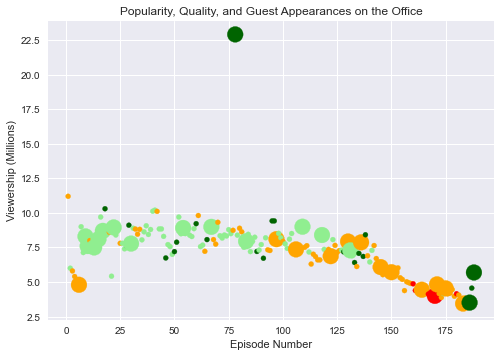

In [301]:
#Task 1.1 & 1.2

plt.scatter(x =tvshow_df['episode'], y=tvshow_df['Viewership'], c=tvshow_df['colors'], s=tvshow_df['sizes'])
plt.title("Popularity, Quality, and Guest Appearances on the Office")
plt.xlabel("Episode Number")
plt.ylabel("Viewership (Millions)")


# Task-2

Text(0, 0.5, 'Viewership (Millions)')

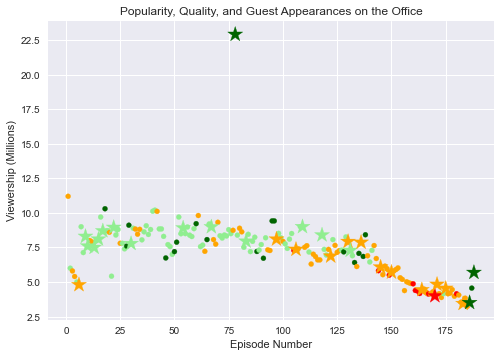

In [302]:
#Seperating the Episodes with and without Guest Stars

non_guest_stars =tvshow_df[tvshow_df['has_guest']==False]
guest_stars = tvshow_df[tvshow_df['has_guest']==True]

plt.scatter(x =non_guest_stars['episode'], 
            y=non_guest_stars['Viewership'], 
            c=non_guest_stars['colors'], 
            s=non_guest_stars['sizes'])

plt.scatter(x =guest_stars['episode'], 
            y=guest_stars['Viewership'], 
            c=guest_stars['colors'], 
            s=guest_stars['sizes'],
           marker='*')

plt.title("Popularity, Quality, and Guest Appearances on the Office")
plt.xlabel("Episode Number")
plt.ylabel("Viewership (Millions)")


In [303]:
#Most popular

most_popular= tvshow_df[tvshow_df['Viewership'] > 20]['GuestStars']

for ind,row in most_popular.items():
    print('The most plpular episode: Episode' +" "+ str(ind)+'.')
    print('The Guest Celeb in most popular episode were'+", "+ row+'.')



The most plpular episode: Episode 77.
The Guest Celeb in most popular episode were, Cloris Leachman, Jack Black, Jessica Alba.
